In [12]:
import pandas as pd
import numpy as np
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

Loading the movies dataset

In [13]:
movies = pd.read_csv("movies.csv")
print("Data loaded successfully. Shape:", movies.shape)

Data loaded successfully. Shape: (4803, 24)


Check for Missing values in the data

In [14]:
print("\nMissing values in each column:")
print(movies.isnull().sum())


Missing values in each column:
index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64


Visualization of top 10 most common movie genres

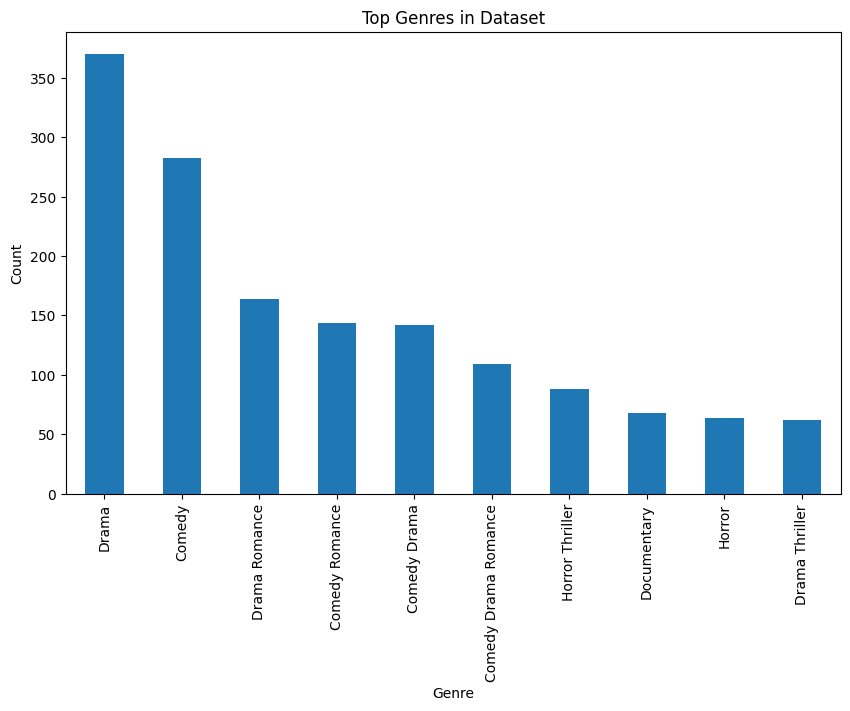

In [15]:
plt.figure(figsize=(10,6))
movies['genres'].value_counts().head(10).plot(kind='bar')
plt.title('Top Genres in Dataset')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

Top 10 Highest-Rated Movies Based on IMDb Scores


Top 10 IMDb Rated Movies:
                         title  vote_average
4662            Little Big Top          10.0
3519          Stiff Upper Lips          10.0
4045     Dancer, Texas Pop. 81          10.0
4247     Me You and Five Bucks          10.0
3992                 Sardaarji           9.5
2386            One Man's Hero           9.3
1881  The Shawshank Redemption           8.5
2970        There Goes My Baby           8.5
3337             The Godfather           8.4
2796     The Prisoner of Zenda           8.4


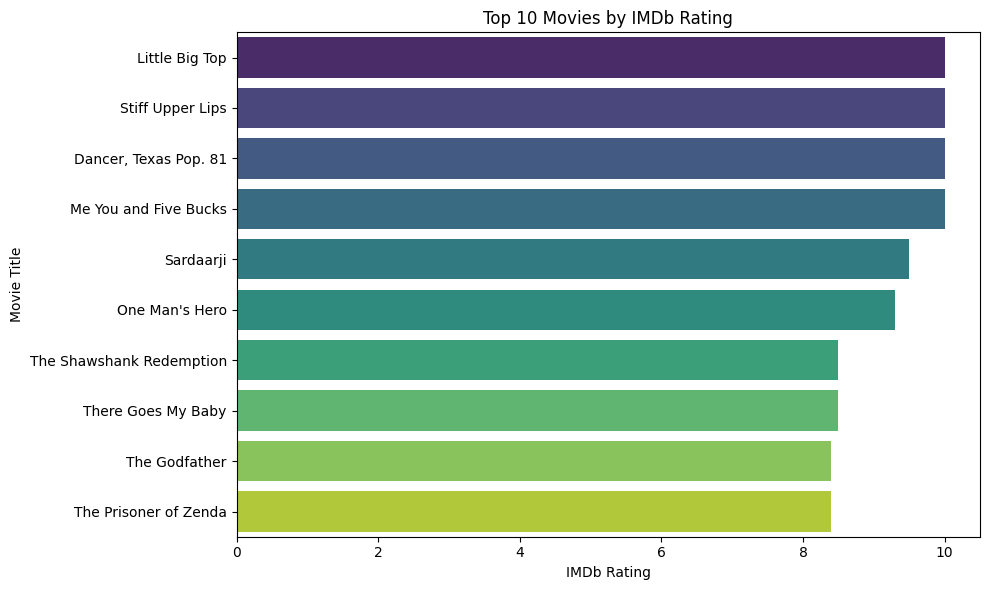

In [16]:
if 'vote_average' in movies.columns:
    top_rated = movies.sort_values(by='vote_average', ascending=False).head(10)
    print("\nTop 10 IMDb Rated Movies:")
    print(top_rated[['title', 'vote_average']])

    plt.figure(figsize=(10,6))
    sns.barplot(x='vote_average', y='title', data=top_rated, hue='title', palette='viridis', legend=False)
    plt.title('Top 10 Movies by IMDb Rating')
    plt.xlabel('IMDb Rating')
    plt.ylabel('Movie Title')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'vote_average' not found in dataset.")

Combining text features

In [17]:
text_columns = ['genres', 'keywords', 'tagline', 'cast', 'director']
for col in text_columns:
    movies[col] = movies[col].fillna('').astype(str)

features = movies['genres'] + ' ' + movies['keywords'] + ' ' + movies['tagline'] + ' ' + movies['cast'] + ' ' + movies['director']

Converting text features into numbers

In [18]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(features)

In [19]:
similarity = cosine_similarity(feature_vectors)

Interactive Movie Recommendation Based on User Input

In [20]:
movie_titles = movies['title'].tolist()

while True:
    user_input = input("\nEnter a movie you like (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break

    matches = difflib.get_close_matches(user_input, movie_titles)

    if not matches:
        print(f"No matches found for '{user_input}'. Try again.")
        continue

    best_match = matches[0]
    movie_index = movies[movies['title'] == best_match].index[0]
    scores = list(enumerate(similarity[movie_index]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:11]

    print(f"\nTop 10 movies similar to '{best_match}':")
    for i, (index, score) in enumerate(sorted_scores, 1):
        print(f"{i}. {movies.iloc[index]['title']} (Score: {score:.2f})")


Enter a movie you like (or type 'exit' to quit): Iron Man

Top 10 movies similar to 'Iron Man':
1. Iron Man 2 (Score: 0.41)
2. Iron Man 3 (Score: 0.31)
3. Avengers: Age of Ultron (Score: 0.24)
4. The Avengers (Score: 0.23)
5. Captain America: Civil War (Score: 0.22)
6. Captain America: The Winter Soldier (Score: 0.21)
7. Ant-Man (Score: 0.20)
8. X-Men (Score: 0.17)
9. Made (Score: 0.16)
10. X-Men: Apocalypse (Score: 0.15)

Enter a movie you like (or type 'exit' to quit): Avatar

Top 10 movies similar to 'Avatar':
1. Alien (Score: 0.25)
2. Aliens (Score: 0.25)
3. Guardians of the Galaxy (Score: 0.25)
4. Star Trek Beyond (Score: 0.20)
5. Star Trek Into Darkness (Score: 0.20)
6. Galaxy Quest (Score: 0.20)
7. Alien³ (Score: 0.18)
8. Cargo (Score: 0.18)
9. Trekkies (Score: 0.17)
10. Gravity (Score: 0.17)

Enter a movie you like (or type 'exit' to quit): Mission Impossible

Top 10 movies similar to 'Mission: Impossible':
1. Mission: Impossible II (Score: 0.27)
2. Raising Cain (Score: 0.22)
